In [1]:

import matplotlib.pyplot as plt
import numpy as np
import skfda
from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

# Example 1

In [ ]:

data_matrix = [[1, 1, 2, 3, 2.5, 2],
               [0.5, 0.5, 1, 2, 1.5, 1],
               [-1, -1, -0.5, 1, 1, 0.5],
               [-0.5, -0.5, -0.5, -1, -1, -1]]
grid_points = [0, 2, 4, 6, 8, 10]

fd = skfda.FDataGrid(data_matrix, grid_points) # data format
kmeans = skfda.ml.clustering.KMeans(n_clusters=3, random_state=0) # para. setting
kmeans.fit(fd) # fit model
group_center = kmeans.cluster_centers_.data_matrix # fitting result (n_clusters, # of length, ?)
group_fd = kmeans.predict(fd) # predict on test data

# Example 2

- source: scikit-fda (from Ramsay & Silverman's FDA book)
- dataset: Canadian Weather
- description: The Canadian weather dataset consists of daily temperature and precipitation measurements for 35 Canadian weather stations, categorized by climate region (Arctic:北極型氣候（很冷，一整年低溫）; Continental:大陸型氣候（冬天冷、夏天熱，溫差大）;Maritime:海洋型氣候（氣溫比較溫和，降水量較多）).

In [38]:
# Obtain data from scikit-fda
X, y = datasets.fetch_weather(return_X_y=True, as_frame=True)
data = X.iloc[:, 0].values # daily average temperature and precipitation
data_temp = data.coordinates[0] # use temperature only
target = y.values # climate region


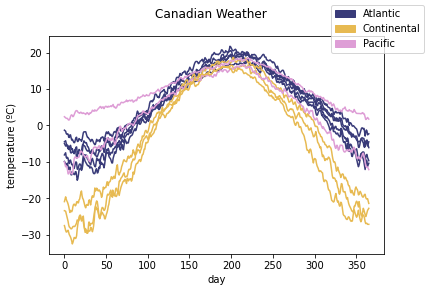

In [ ]:
# Select subdata: select 10 samples, so that the example provides clearer plots.
indices_samples = np.array([1, 3, 5, 10, 14, 17, 21, 25, 27, 30])
fd = data_temp[indices_samples]
climates = target[indices_samples].remove_unused_categories()

# Visualization: assigning the color to each of the groups.
colormap = plt.cm.get_cmap('tab20b')
n_climates = len(climates.categories)
climate_colors = colormap(np.arange(n_climates) / (n_climates - 1)) # return 4 values for each color, which are R,G,B,alpha(transparency) 
fd.plot(group=climates.codes, group_names=climates.categories, group_colors=climate_colors); # 

[0 1 0 0 0 2 2 1 0 2]


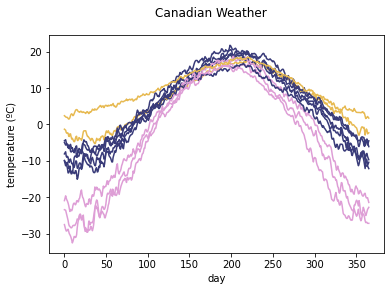

In [43]:
n_clusters = 3
seed = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
kmeans.fit(fd)
pred_class = kmeans.predict(fd)
print(kmeans.predict(fd))
fd.plot(group=pred_class, group_colors=climate_colors);